# Exploratory Data Analysis -Terrorism
* Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
* As a security/defense analyst, try to find out the hot zone of terrorism.
* What all security issues and insights you can derive by EDA?

In [32]:
import sklearn.datasets as datasets
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
terror_df = pd.read_csv('globalterrorism.csv' , encoding='ISO-8859-1')
terror_df.head()

C:\Users\pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [4]:
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror_df=terror_df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror_df.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN  
2     Unknown    NaN  
3  Explosives    NaN  
4  Incendiary    NaN

In [5]:
terror_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

##  Hot zone of terrorism

In [6]:
print("Country with the most attacks:",terror_df['Country'].value_counts().idxmax())
print("City with the most attacks:",terror_df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror_df['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror_df['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror_df['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror_df['Group'].value_counts().index[1])
print("Most Attack Types:",terror_df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


## Terrorist Activities by Region in each Year through Area Plot

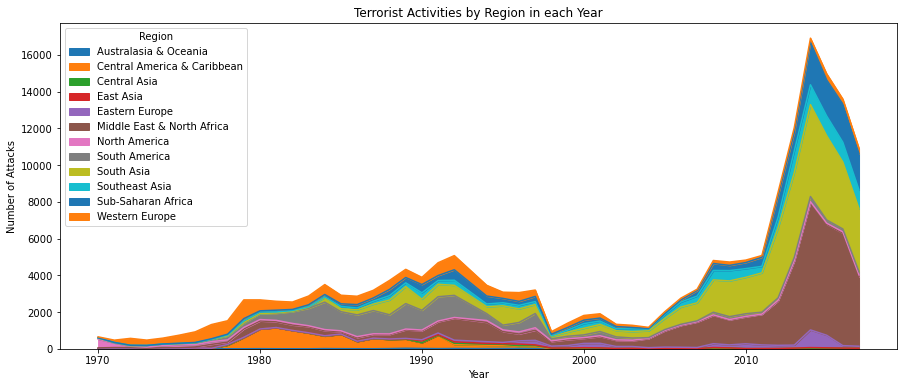

In [7]:
pd.crosstab(terror_df.Year, terror_df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

## Number of Terrorist Activities each Year

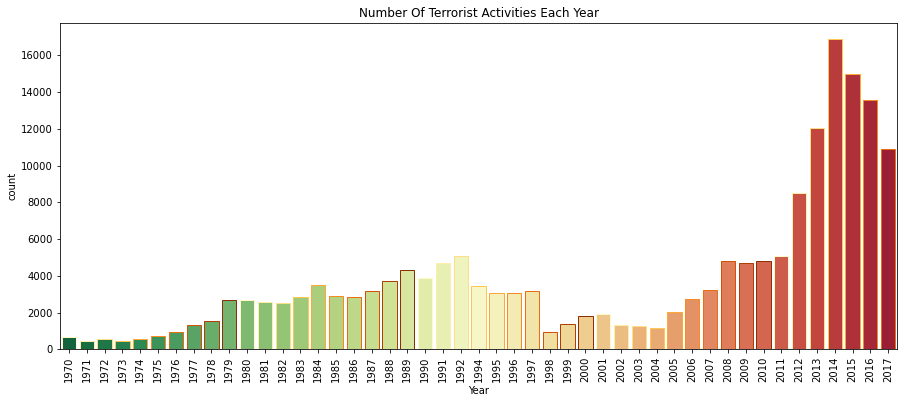

In [8]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_df,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

We observe that a spike in Terorist activies between 2011-2017

## Top Countries affected by Terror Attacks

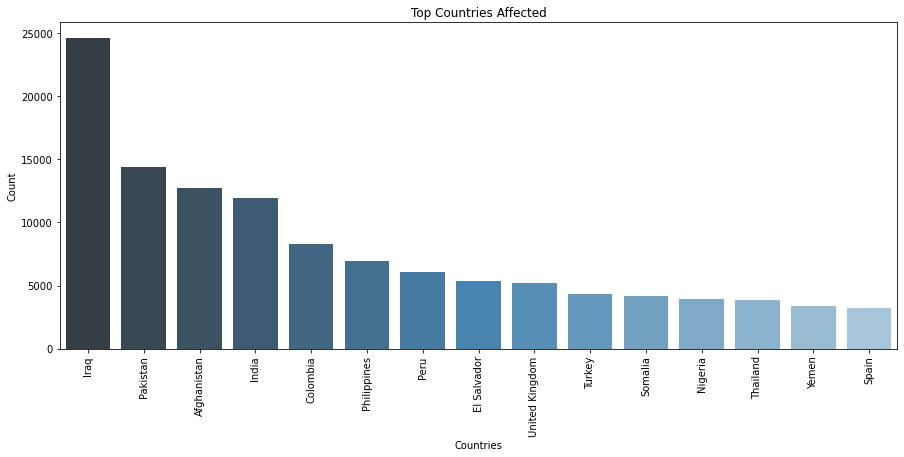

In [9]:

plt.subplots(figsize=(15,6))
sns.barplot(terror_df['Country'].value_counts()[:15].index,terror_df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

Here we observe the top 15 countries with the highest number of terrorist attacks. Iraq ,Pakistan, Afghanistan, India and Colombia are the top 5 countries. Among these countries, 7 are Aisian, 3 African and the others European and South American.

## Type of Attack

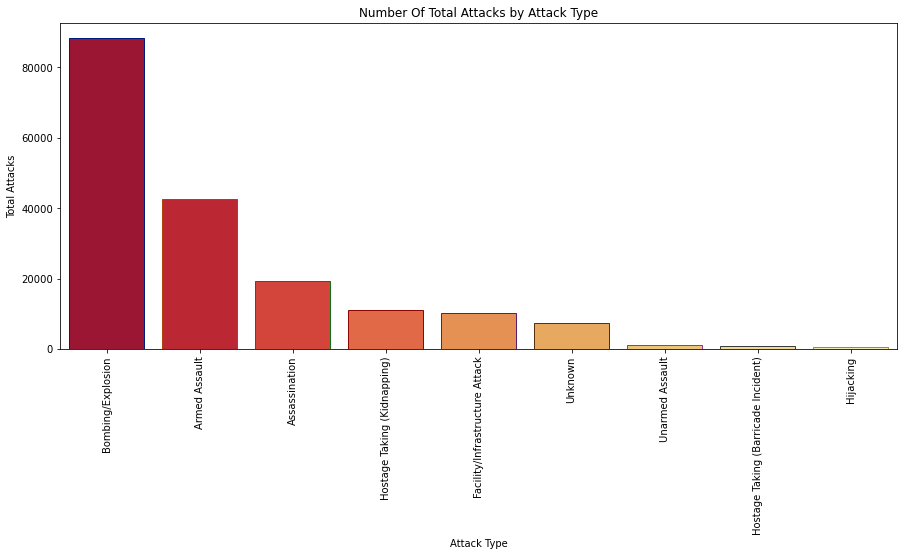

In [11]:
attack_type = terror_df.AttackType.value_counts().to_frame().reset_index()
attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_type['Attack Type'], y=attack_type['Total Attacks'], palette='YlOrRd_r',
            edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks by Attack Type')
plt.show()

Here we observe that the attack with Bombing/Explosion is maximum followed by Armed Assault and with Hijacking is minimun

## top countries that have suffered the most attacks

In [16]:
terror_df['casualities'] = terror_df['Killed'] + terror_df['Wounded']
terror_bubble_df = terror_df[(terror_df['Group'] != 'Unknown') & (terror_df['casualities'] > 50)]
terror_bubble_df.head()


Year  Month  Day         Country             state  \
1200  1972      3    4  United Kingdom  Northern Ireland   
1314  1972      5   30          Israel           Central   
1789  1973      3    8  United Kingdom           England   
1972  1973      8    5          Greece            Attica   
2138  1973     12   17           Italy             Lazio   

                          Region     city   latitude  longitude  \
1200              Western Europe  Belfast  54.607712  -5.956210   
1314  Middle East & North Africa      Lod  32.004361  34.888229   
1789              Western Europe   London  51.504387  -0.140041   
1972              Western Europe   Athens  37.997490  23.762728   
2138              Western Europe     Rome  41.890961  12.490069   

                               AttackType  Killed  Wounded  \
1200                    Bombing/Explosion     2.0    130.0   
1314                    Bombing/Explosion    26.0     72.0   
1789                    Bombing/Explosion     1.0    238.0   
1972                    Bombing/Explosion     5.0     55.0   
2138  Hostage Taking (Barricade Incident)    30.0     50.0   

                                              Target Summary  \
1200  Janet Bereen, 21 and Anne Owens, 22, Catholics     NaN   
1314                               Aircraft Terminal     NaN   
1789                                  Court Building     NaN   
1972                                      TWA Lounge     NaN   
2138            Pan Am Lounge and Loading Pan Am 707     NaN   

                            Group           Target_type Weapon_type Motive  \
1200  Irish Republican Army (IRA)              Business  Explosives    NaN   
1314      Japanese Red Army (JRA)   Airports & Aircraft    Firearms    NaN   
1789  Irish Republican Army (IRA)  Government (General)  Explosives    NaN   
1972              Black September   Airports & Aircraft    Firearms    NaN   
2138              Black September   Airports & Aircraft    Firearms    NaN   

      casualities  
1200        132.0  
1314         98.0  
1789        239.0  
1972         60.0  
2138         80.0

In [67]:
terror_fol=terror_df.copy()
terror_fol.dropna(subset=['latitude','longitude'],inplace=True)
location_fol=terror_fol[['latitude','longitude']][:5000]
country_fol=terror_fol['Country'][:5000]
city_fol=terror_fol['city'][:5000]
killed_fol=terror_fol['Killed'][:5000]
wound_fol=terror_fol['Wounded'][:5000]
def color_point(x):
    if x>=30:
        color='red'
    elif ((x>0 and x<30)):
        color='blue'
    else:
        color='green'
    return color   
def point_size(x):
    if (x>30 and x<100):
        size=2
    elif (x>=100 and x<500):
        size=8
    elif x>=500:
        size=16
    else:
        size=0.5
    return size   
map2 = folium.Map(location=[30,0],tiles='CartoDB dark_matter',zoom_start=2)
for point in location_fol.index:
    info='<b>Country: </b>'+str(country_fol[point])+'<br><b>City: </b>: '+str(city_fol[point])+'<br><b>Killed </b>: '+str(killed_fol[point])+'<br><b>Wounded</b> : '+str(wound_fol[point])
    iframe = folium.IFrame(html=info, width=200, height=200)
    folium.CircleMarker(list(location_fol.loc[point].values),popup=folium.Popup(iframe),radius=point_size(killed_fol[point]),color=color_point(killed_fol[point])).add_to(map2)
map2

## Terrorist organizations 

In [26]:
terror_df.Group.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

In [28]:
test = terror_df[terror_df.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

## Attacks and Casualities in each country

In [61]:
city_attacks.columns = ['city', 'Total Attacks']
city_cas = terror_df.groupby('city').casualities.sum().to_frame().reset_index()
city_cas.columns = ['city', 'casualities']
# city_cas.drop('Unknown', axis=0, inplace=True)
city_tot = pd.merge(city_attacks, city_cas, how='left', on='city').sort_values('Total Attacks', ascending=False)[1:21]

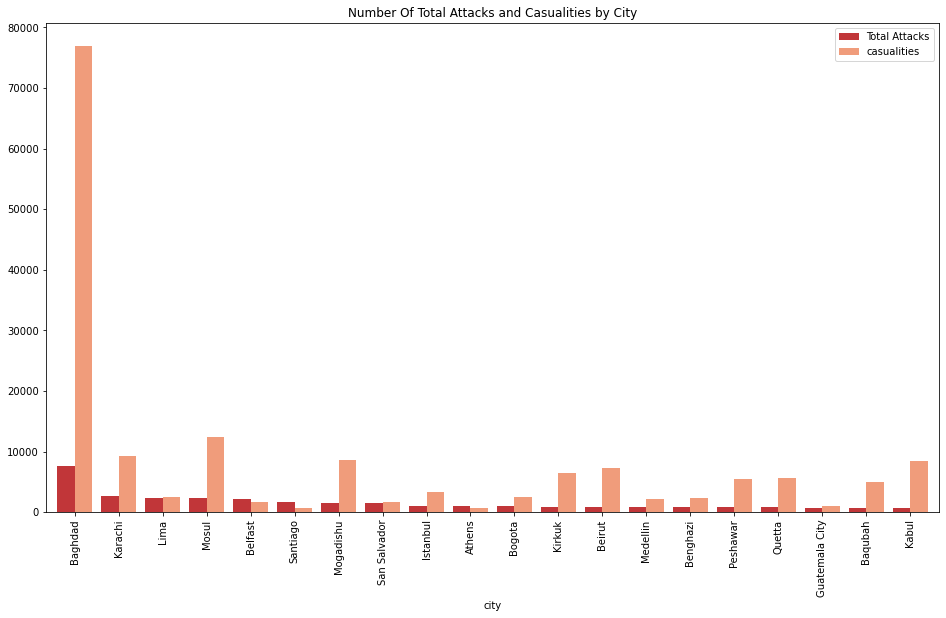

In [62]:

sns.set_palette('RdBu')
city_tot.plot.bar(x='city', width=0.8)
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks and Casualities by City')
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()

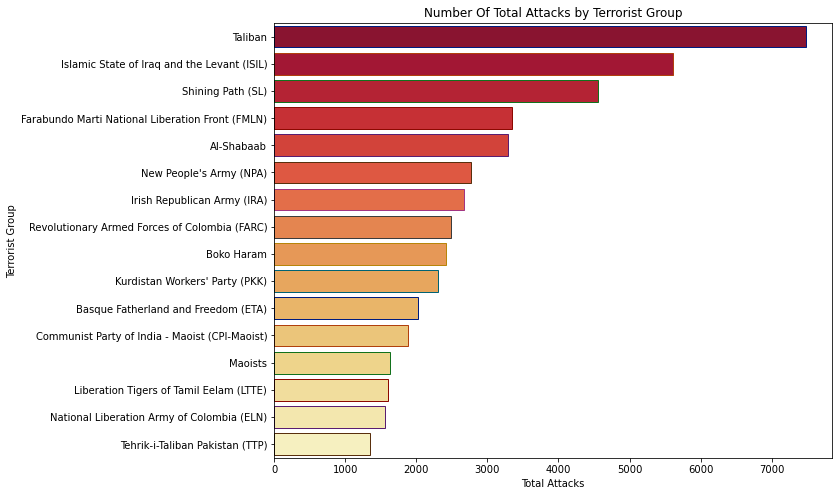

In [64]:
group_attacks = terror_df.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plt.subplots(figsize=(10,8))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='YlOrRd_r',
            edgecolor=sns.color_palette('dark', 10))
# plt.xticks()
plt.title('Number Of Total Attacks by Terrorist Group')
plt.show()

# Inferences

Country with the most attacks: Iraq

City with the most attacks: Baghdad

Region with the most attacks: Middle East & North Africa

Terrorist Activities maximum in the region - Australasia and oceannia followed by Central America and Caribbean

A spike in Terorist activies between 2011-2017

Countries affected by Terror Attacks most isIraq followed by Pakistan

The attack with Bombing/Explosion is maximum followed by Armed Assault and with Hijacking is minimun

Top terrorist organisation is Taliban with count 7478 followed by Islamic State of Iraq and the Levant (ISIL) with count 5613.

Attacks and Casualities Baghdad has maximum casuality and attacks, casualities in Bhaghdad being uncasually large.

Total Attacks by Taliban Group being the maximum followed by Islamic State of Iraq and the Levant (ISIL).